## Classification Model for the Chemical Components of Red Wine

DSCI-100 - 005   
Group - 1:

Kritika Kajaria     
Bohan Li   
Andy Lu   
Marcin Tkacz  


## Introduction:

Antinori, an esteemed and historic winery in the heart of Italy’s Tuscany region, is renowned for its exceptional red wines. The winery’s pursuit of excellence mirrors the global trends observed in the wine industry, where the demand for high-quality red wines has seen a notable surge (Market Reports World, 2023).   

Utilizing datasets like the “Red Wine Quality” dataset from the UC Irvine Machine Learning Repository, which includes variables such as acidity, sugar content, and alcohol level, researchers and winemakers are turning to scientific methods to predict and ensure the quality of their wines. This dataset includes 1599 rows with no missing values. The variables included are quantitative with the exception to quality being categorical.  

In the case of Antinori, the focus is on red wines, primarily made from Sangiovese and other grape varieties. Antinori’s wines have distinct physicochemical profiles that contribute to their quality. The dataset’s attributes such as fixed acidity, citric acid, residual sugar and quality variables could be adapted to reflect the unique characteristics of Antinori’s red wines. By cleaning and preprocessing a dataset tailored to red wines, a k-nearest-neighbor classification model could be implemented for wine quality predictions. The main predictors we will be investigating are volatile acidity, total sulphur dioxide, citric acid, alcohol, density and sulphates.

Volatile acidity refers to the presence of volatile acids in wine, primarily acetic acid. High levels of volatile acidity can contribute to off-flavors, such as vinegar-like aromas, and are generally considered undesirable in wine. Controlling volatile acidity is essential for maintaining wine quality (Zhang et al. 2022).

Sulphur dioxide (SO2) is commonly used in winemaking as a preservative to prevent oxidation and microbial spoilage. Total sulphur dioxide levels indicate the amount of SO2 present in the wine. Proper management of sulphur dioxide levels is crucial for preserving wine quality and makes it less likely the wine will spoil (Zhang et al. 2022).

Citric acid is a naturally occurring organic acid found in grapes and is also sometimes added during winemaking. It can contribute to the acidity and flavor profile of wine. Citric acid levels can affect the perceived freshness and balance of the wine, and its presence can affect quality of the  wine (Tedesco et al. 2000).

Alcohol content is a significant factor in wine quality and can impact the wine's body, texture, and perceived sweetness. Higher alcohol levels can contribute to a fuller body and richer mouthfeel, while lower alcohol levels may result in a lighter-bodied wine. Alcohol content also influences the wine's ability to age and develop complex flavors over time (Tedesco et al. 2000).

Density is a physical property of wine that can provide insights into its composition and concentration of dissolved solids. Changes in density may indicate differences in sugar content, alcohol level, or overall wine concentration. Density measurements can be useful for quality control and consistency in winemaking (Zhang et al. 2022).

Sulphates are compounds containing sulfur that may be added to wine as a preservative or anti-microbial agent. Sulphates can help prevent microbial spoilage and oxidation, therefore preserving wine quality and extending its shelf life. However, excessive sulphate levels can sometimes lead to undesirable aromas or tastes in wine (Zhang et al. 2022).

#### Predictive Question:  
How can we predict the quality of red wines using their physicochemical attributes?

## Methods & Results

In [1]:
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
### Run this cell before continuing.
set.seed(2934)
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
library(janitor)
library(ggplot2)
library(dplyr)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Downloading the data to use during our Analysis.

In [3]:
# url and raw version of our dataset
red_wine_url <- "https://raw.githubusercontent.com/Marcin-tk/dsci-100-2023-w2-group-001/main/winequality-red.csv"
download.file(red_wine_url, "winequality-red.csv")

Extracting the data from the downloaded file

In [4]:
red_wine_data_raw <- read_delim("winequality-red.csv")
head(red_wine_data_raw)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


From the above we can see that the data is not clean to do Exploratory Data Analysis. We can that the names of the variables have spaces between them, thus we have to make them suitable for use. Finally, we also have to make the `quality` column, a factor as we will use it as our Class, i.e. the categorical variable during our analysis

In [5]:
#cleaning our data set
red_wine_data <- red_wine_data_raw |>
    clean_names() |>
    map_df(as.numeric) |>
    mutate(quality = as_factor(quality))
head(red_wine_data)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Using the clean data we created above, we will spit our data into training & testing set, then perform exploratory data analysis.

In [6]:
#splitting the data set into training and testing 
redwine_split <- initial_split(red_wine_data, prop = 0.75, strata = quality)
redwine_train <- training(redwine_split) #training data
redwine_test <- testing(redwine_split) #testing data
head(redwine_train)
head(redwine_test)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
7.8,0.60,0.14,2.4,0.086,3,15,0.9975,3.42,0.60,10.8,6


Now, using our training set, we will be doing an exploratory analysis of it. 

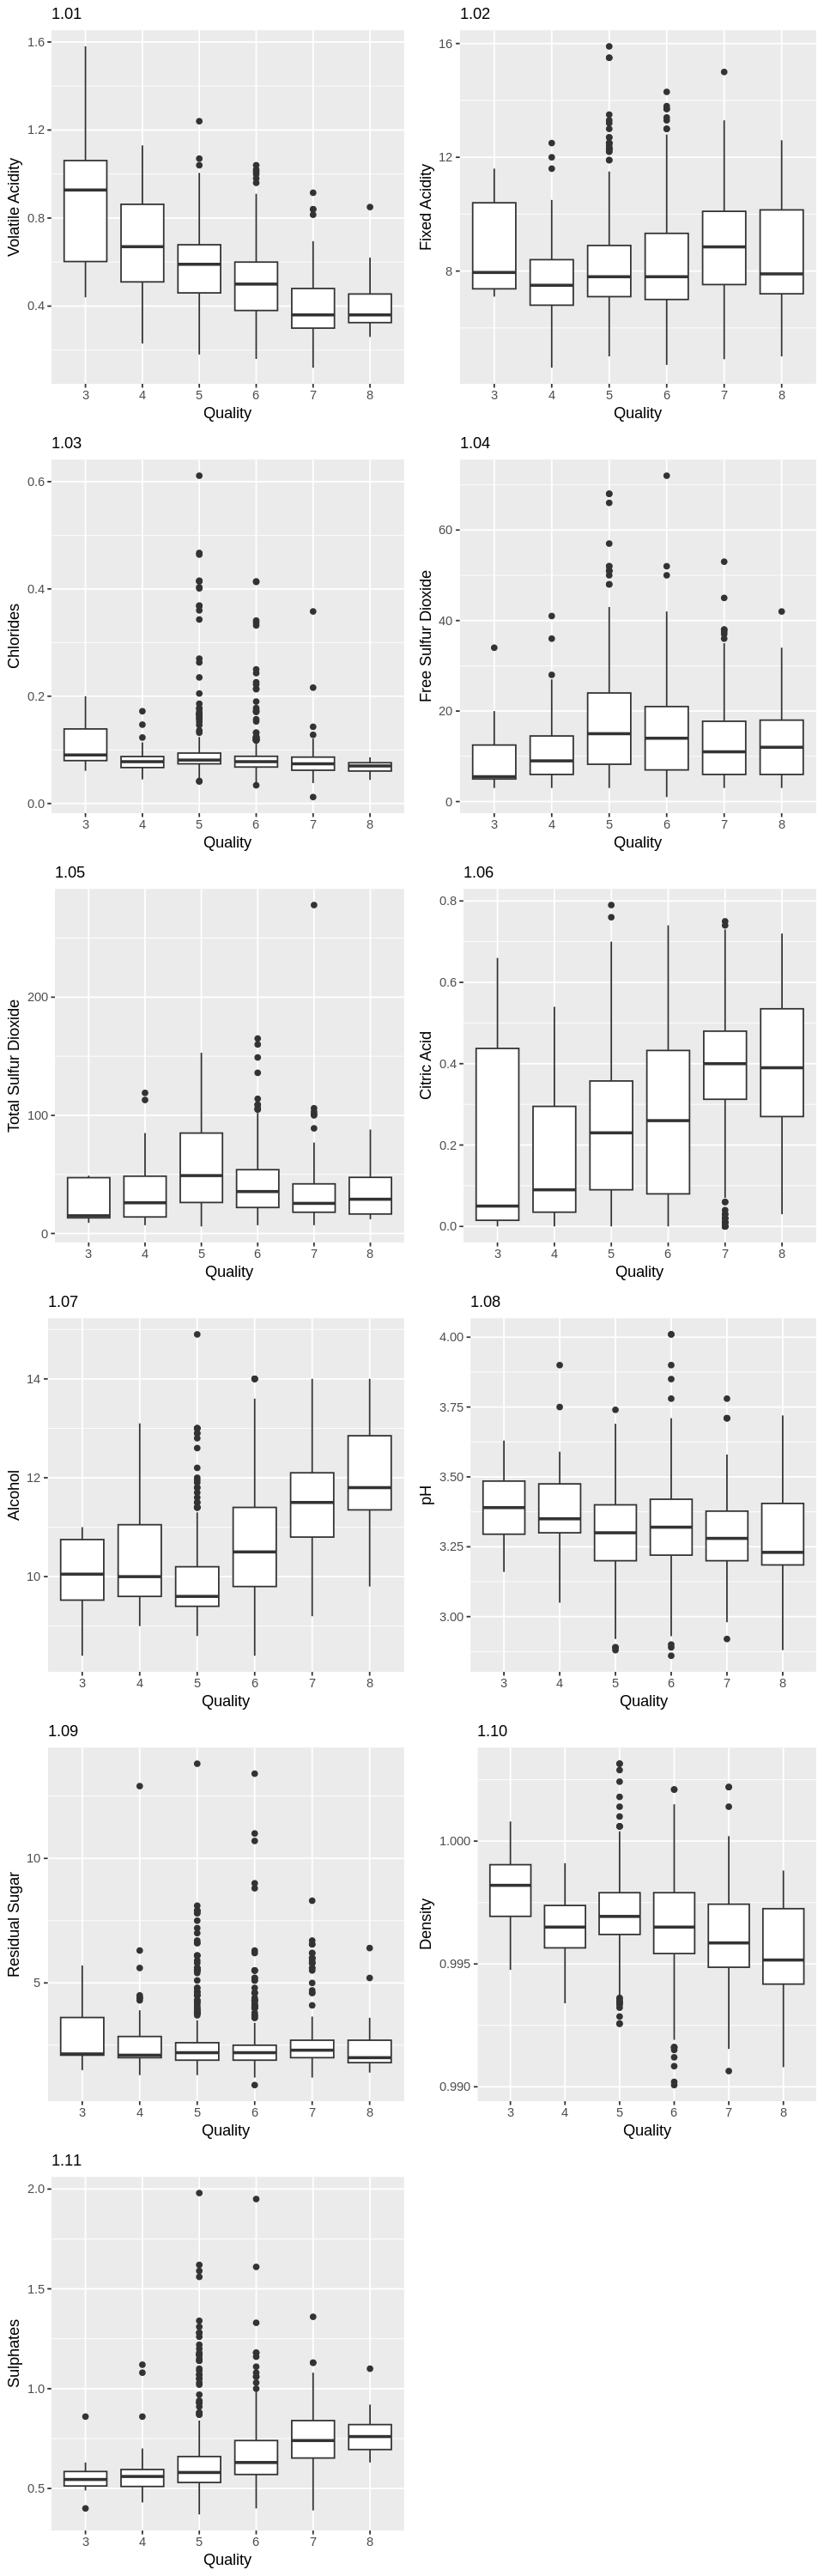

In [7]:
# Setting the width and height of the plot
options(repr.plot.width=8, repr.plot.height=25)

# Individual box plots for each column against 'quality'

# volatile_acidity
plot_volatile_acidity <- ggplot(redwine_train, aes(x=quality, y=volatile_acidity)) +
    geom_boxplot() +
    labs(x="Quality", y="Volatile Acidity", subtitle="1.01")

# fixed_acidity
plot_fixed_acidity <- ggplot(redwine_train, aes(x=quality, y=fixed_acidity)) +
    geom_boxplot() +
    labs(x="Quality", y="Fixed Acidity", subtitle="1.02")

# chlorides
plot_chlorides <- ggplot(redwine_train, aes(x=quality, y=chlorides)) +
    geom_boxplot() +
    labs(x="Quality", y="Chlorides", subtitle="1.03")

# free_sulfur_dioxide
plot_free_sulfur_dioxide <- ggplot(redwine_train, aes(x=quality, y=free_sulfur_dioxide)) +
    geom_boxplot() +
    labs(x="Quality", y="Free Sulfur Dioxide", subtitle="1.04")

# total_sulfur_dioxide
plot_total_sulfur_dioxide <- ggplot(redwine_train, aes(x=quality, y=total_sulfur_dioxide)) +
    geom_boxplot() +
    labs(x="Quality", y="Total Sulfur Dioxide", subtitle="1.05")

# citric_acid
plot_citric_acid <- ggplot(redwine_train, aes(x=quality, y=citric_acid)) +
    geom_boxplot() +
    labs(x="Quality", y="Citric Acid", subtitle="1.06")

# alcohol
plot_alcohol <- ggplot(redwine_train, aes(x=quality, y=alcohol)) +
    geom_boxplot() +
    labs(x="Quality", y="Alcohol", subtitle="1.07")

# p_h
plot_ph <- ggplot(redwine_train, aes(x=quality, y=p_h)) +
    geom_boxplot() +
    labs(x="Quality", y="pH", subtitle="1.08")

# residual_sugar
plot_residual_sugar <- ggplot(redwine_train, aes(x=quality, y=residual_sugar)) +
    geom_boxplot() +
    labs(x="Quality", y="Residual Sugar", subtitle="1.09")

# density
plot_density <- ggplot(redwine_train, aes(x=quality, y=density)) +
    geom_boxplot() +
    labs(x="Quality", y="Density", subtitle="1.10")

# sulphates
plot_sulphates <- ggplot(redwine_train, aes(x=quality, y=sulphates)) +
    geom_boxplot() +
    labs(x="Quality", y="Sulphates", subtitle="1.11")
#create a lists of the plots
plots <- list(plot_volatile_acidity, plot_fixed_acidity, plot_chlorides, 
              plot_free_sulfur_dioxide, plot_total_sulfur_dioxide, plot_citric_acid, 
              plot_alcohol, plot_ph, plot_residual_sugar, 
              plot_density, plot_sulphates)
#merging all plots
plot_grid(plotlist = plots, ncol = 2)


By looking at the boxplots above, we can know which variables affect the quality of red wine the most. The different lengths of the boxplots tell us which variables have a high effect on the quality.
By looking at these plots we can choose the variables: 
1. Volatile Acidity
2. Total Sulphur Dioxide
3. Citric Acid
4. Alcohol
5. Density
6. Sulphates
   
To further distinguish between relevant predictors, we will now perform a summary analysis of our selected predictors from our training dataset.

In [8]:
#selecting the required variables as decided above
red_wine_select <-red_wine_data|>
    select (quality, volatile_acidity,total_sulfur_dioxide, citric_acid, 
            alcohol, density, sulphates)
#Summarise training set
summary_red_wine_training <- redwine_train |>
        group_by(quality)|>
        summarize(mean_volatile_acidity = mean(volatile_acidity),
                  mean_total_sulfur_dioxide = mean(total_sulfur_dioxide),
                 mean_citric_acid = mean(citric_acid) ,
                  mean_alcohol = mean(alcohol) ,
                 mean_density = mean(density) ,
                 mean_sulphates = mean(sulphates),
                 total_count = n())
summary_red_wine_training
print("Table 1: Summary Training Set")

quality,mean_volatile_acidity,mean_total_sulfur_dioxide,mean_citric_acid,mean_alcohol,mean_density,mean_sulphates,total_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.9087500,26.00000,0.2112500,9.975000,0.9979912,0.5700000,8
4,0.6867949,36.46154,0.1794872,10.353846,0.9963595,0.5853846,39
5,0.5803039,57.87843,0.2427255,9.900588,0.9971024,0.6279412,510
6,0.5004622,40.84244,0.2700000,10.657773,0.9965545,0.6700420,476
7,0.3985667,33.14000,0.3715333,11.441667,0.9961711,0.7496667,150
8,0.4220000,36.86667,0.3780000,12.073333,0.9953100,0.7840000,15


[1] "Table 1: Summary Training Set"


From the above Tables, we can see that the predictors we have selected has variations with `quality`.
The `total_count` column shows the number of observations for each level of quality, revealing a noticeable imbalance. Specifically, there is a larger amount of data for quality levels 5 and 6 and also level 7 to an extent compared to the others. Such an imbalance could skew the results of a KNN model, suggesting that strategies to mitigate this imbalance, like upsampling, might be necessary.

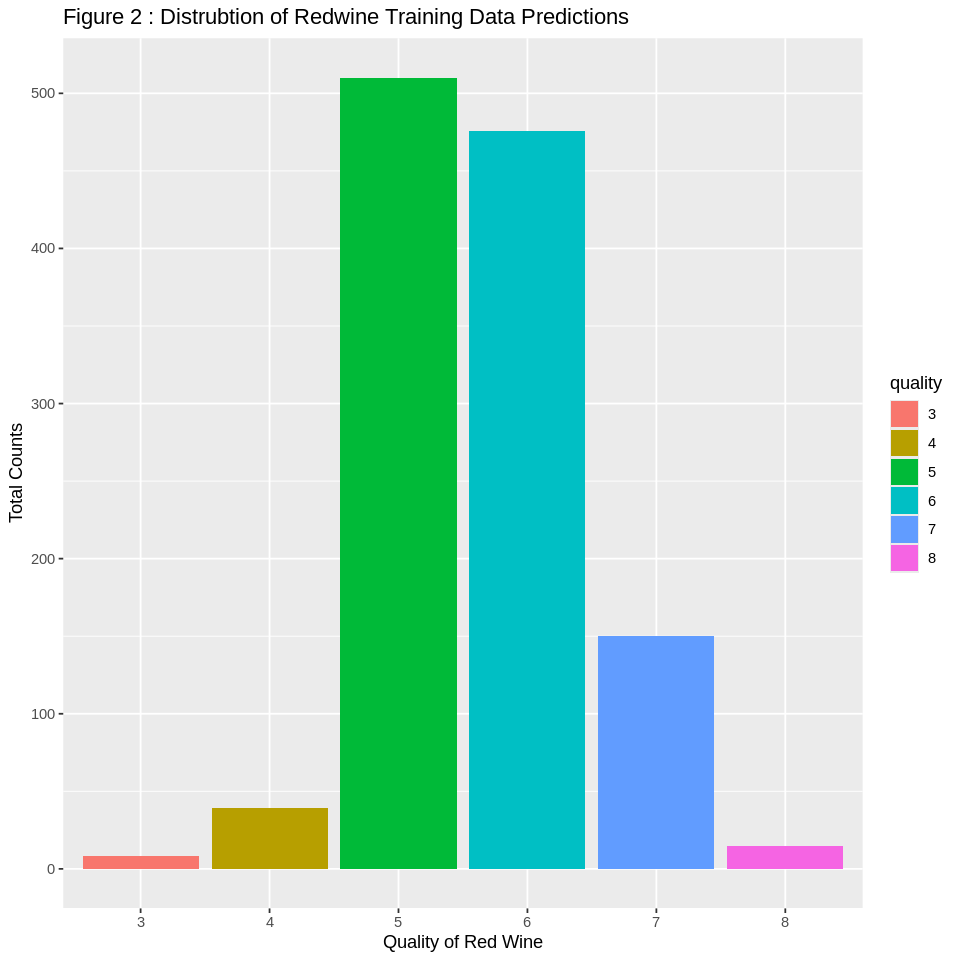

In [9]:
options(repr.plot.width=8, repr.plot.height = 8)

red_wine_train_countplot <- summary_red_wine_training |>
    ggplot(aes(x = quality, y = total_count, fill = quality)) +
    geom_bar(stat = "identity") +
    labs(x = "Quality of Red Wine", y = "Total Counts",
         title = "Figure 2 : Distrubtion of Redwine Training Data Predictions",
        fill = "quality")

red_wine_train_countplot

        

From the above graph, we can easily see that our qualities are not distributed properly, thus we need to upscale the graph.

For this purpose, we have to create a recipe that rebalances our dataset by oversampling all the qualities and maintaining a 1:1 ratio.

In [10]:
redwine_recipe <- recipe(quality ~ volatile_acidity + total_sulfur_dioxide + citric_acid + alcohol + density + sulphates, data = redwine_train) |>
  step_upsample(quality, over_ratio = 1, skip = FALSE) |>
  prep()

upsampled_redwine_train <- bake(redwine_recipe, redwine_train)

summary_redwine_train_data2 <- upsampled_redwine_train |>
  group_by(quality) |>
  summarise(total_count = n())

summary_redwine_train_data2
print("Table 2: Summary upscaled")

quality,total_count
<fct>,<int>
3,510
4,510
5,510
6,510
7,510
8,510


[1] "Table 2: Summary upscaled"


The summary table presented indicates that the class values have been equalized. We will proceed to employ this balanced data to formulate a recipe that normalizes all predictor variables, preparing them for model training.

In [11]:
redwine_recipe_upsampled <- recipe(quality ~ volatile_acidity + total_sulfur_dioxide + citric_acid + alcohol + density + sulphates, data = upsampled_redwine_train) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())

To determine the most effective 'k' value for the k-nearest-neighbor classifier, we implement 5-fold cross-validation, partitioning the training dataset into five distinct validation subsets. This approach, involving multiple training sets, provides a more accurate estimate of the model's classification accuracy, assisting in the identification of the optimal number of neighbors.

In [12]:
set.seed(5678)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from=1,to=10,by=1))

redwine_train_vfold <- vfold_cv(upsampled_redwine_train, v=5,strata=quality)

vfold_metrics <- workflow() |>
                    add_recipe(redwine_recipe_upsampled) |>
                    add_model(knn_spec) |>
                    tune_grid(resamples=redwine_train_vfold, grid=k_vals) |>
                    collect_metrics()

accuracies <- vfold_metrics |> filter(.metric=="accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9094771,5,0.0008331731,Preprocessor1_Model01
2,accuracy,multiclass,0.9094771,5,0.0008331731,Preprocessor1_Model02
3,accuracy,multiclass,0.8588235,5,0.0041850485,Preprocessor1_Model03
4,accuracy,multiclass,0.8477124,5,0.0035574413,Preprocessor1_Model04
5,accuracy,multiclass,0.8261438,5,0.0083573280,Preprocessor1_Model05
6,accuracy,multiclass,0.8196078,5,0.0076396534,Preprocessor1_Model06
7,accuracy,multiclass,0.8026144,5,0.0077919079,Preprocessor1_Model07
8,accuracy,multiclass,0.7986928,5,0.0070166374,Preprocessor1_Model08
9,accuracy,multiclass,0.7911765,5,0.0071485761,Preprocessor1_Model09



Based on the accuracy table provided, the best value of K would be the one with the highest mean accuracy. In the table, the topmost K values (which seem to be K=1 and K=2) both have the highest mean accuracy of 0.9029412. Typically, K=1 can be very sensitive to noise in the data, so it's often recommended to choose a higher K value to avoid overfitting.

Considering the balance between accuracy and the risk of overfitting, K=2 could the bestood candidate as it has the same highest mean accuracy but may be less prone to noise than K=1. 

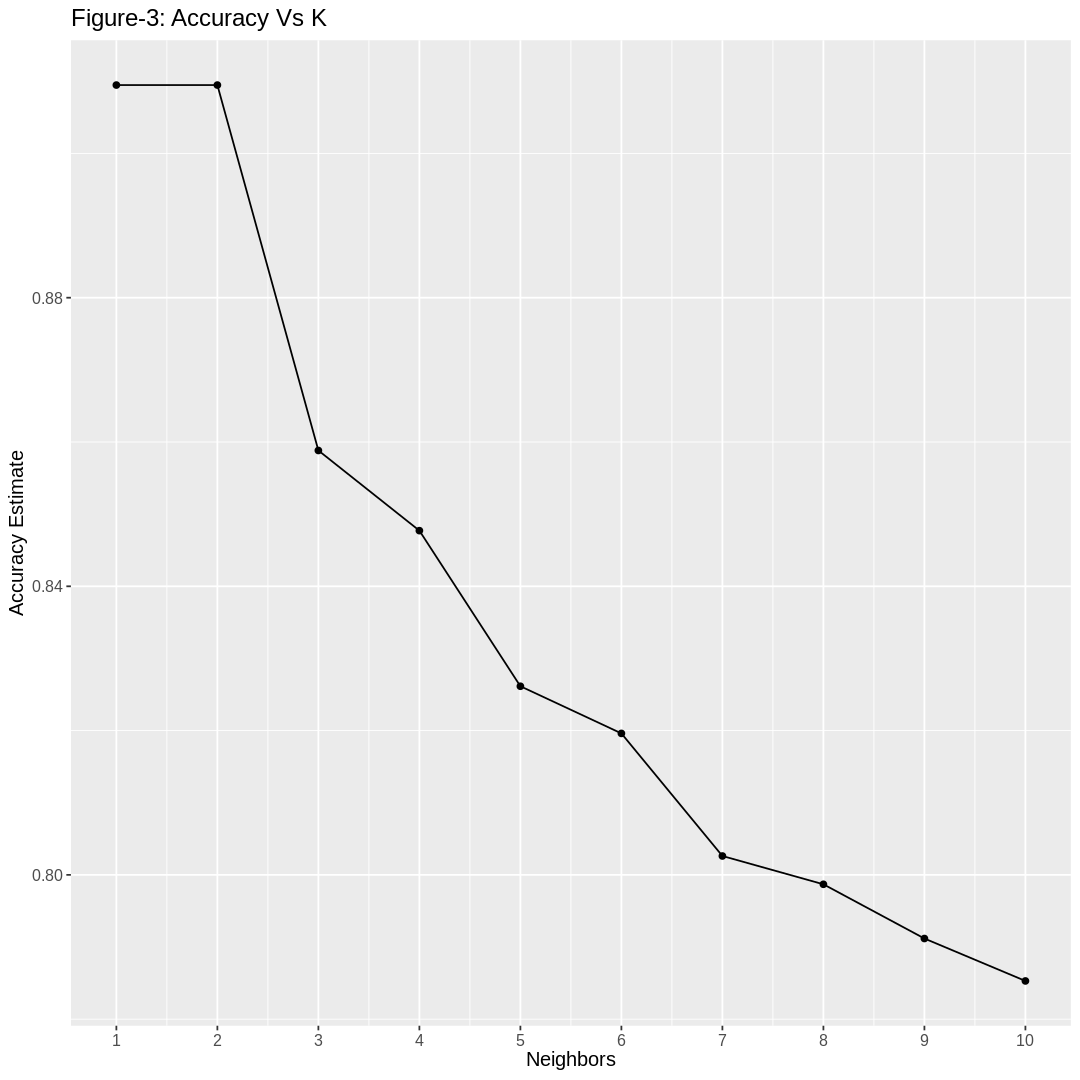

In [13]:
options(repr.plot.width=9,repr.plot.height=9)

accuracy_vs_k <- ggplot(accuracies, aes(x=neighbors, y=mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x="Neighbors", y="Accuracy Estimate") +
                    scale_x_continuous(limits=c(1,10), breaks=1:10) +
                    theme(text=element_text(size=12)) +
                    ggtitle("Figure-3: Accuracy Vs K")
accuracy_vs_k
     

Looking above at the accuracy vs k-neighbors line plot (figure 3) we can see that the curve is peaking at k=1 and k=2, but as explained we should take k=2. This provides an indication that our classification model would be able to give best predictions at k=2. Thus, we will retrain our dataset with a neighbor of k=2

In [14]:
set.seed(2934)

#recreating spec with best K
redwine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
            set_engine("kknn") |>
            set_mode("classification")

#recreating the model with the new recipe
redwine_fit <- workflow() |>
            add_recipe(redwine_recipe_upsampled) |>
            add_model(redwine_spec) |>
            fit(data=redwine_test)


#predicting the results of wine_test data
redwine_test_predictions <- predict(redwine_fit, redwine_test) |>
                            bind_cols(redwine_test)

head(redwine_test_predictions)


.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
5,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
5,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
5,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
6,7.8,0.60,0.14,2.4,0.086,3,15,0.9975,3.42,0.60,10.8,6


Now we will check the accuracy of the prediction results using metrics and see the table of predicted and correct labels using Confusion Matrix

In [15]:
# filtering the accuracy by comparing the predicted and truth column
redwine_test_predictions |> metrics(truth=quality, estimate=.pred_class) |> filter(.metric == "accuracy")
     

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,1


In [16]:
# Creating a confusion matrix to understand the distribution of correct and incorrect labels
redwine_confusion <- redwine_test_predictions |> conf_mat(truth=quality, estimate=.pred_class)
redwine_confusion
     


          Truth
Prediction   3   4   5   6   7   8
         3   2   0   0   0   0   0
         4   0  14   0   0   0   0
         5   0   0 171   0   0   0
         6   0   0   0 162   0   0
         7   0   0   0   0  49   0
         8   0   0   0   0   0   3

The accuracy metric for the multiclass classification is reported to be perfect, at 1 or 100%. This suggests that every prediction made by the model exactly matches the true quality ratings in the test set.

When examining the provided confusion matrix, it's evident that the model's predictions align flawlessly with the true labels. Every cell on the diagonal (which represents correct predictions) contains the total number of observations for that class, and there are zero instances in the off-diagonal cells (which would represent misclassifications). For example, for quality rating 5, there are 171 observations, and the model correctly predicted all 171. This pattern is consistent across all quality ratings presented in the matrix.

Given the perfect accuracy and the confusion matrix, it can be concluded that the model has exhibited flawless performance on the test set. However, a 100% accuracy rate is extremely rare in practice

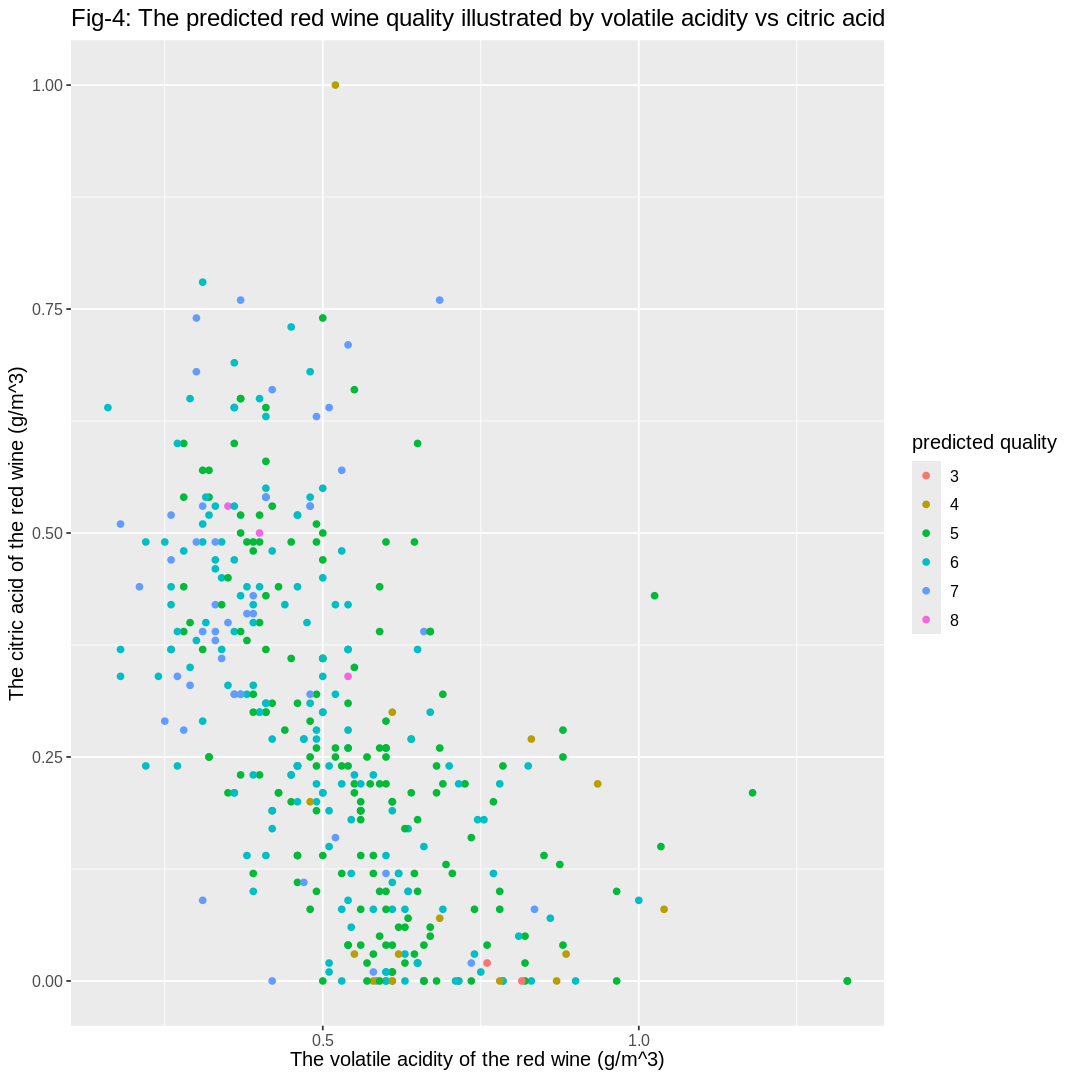

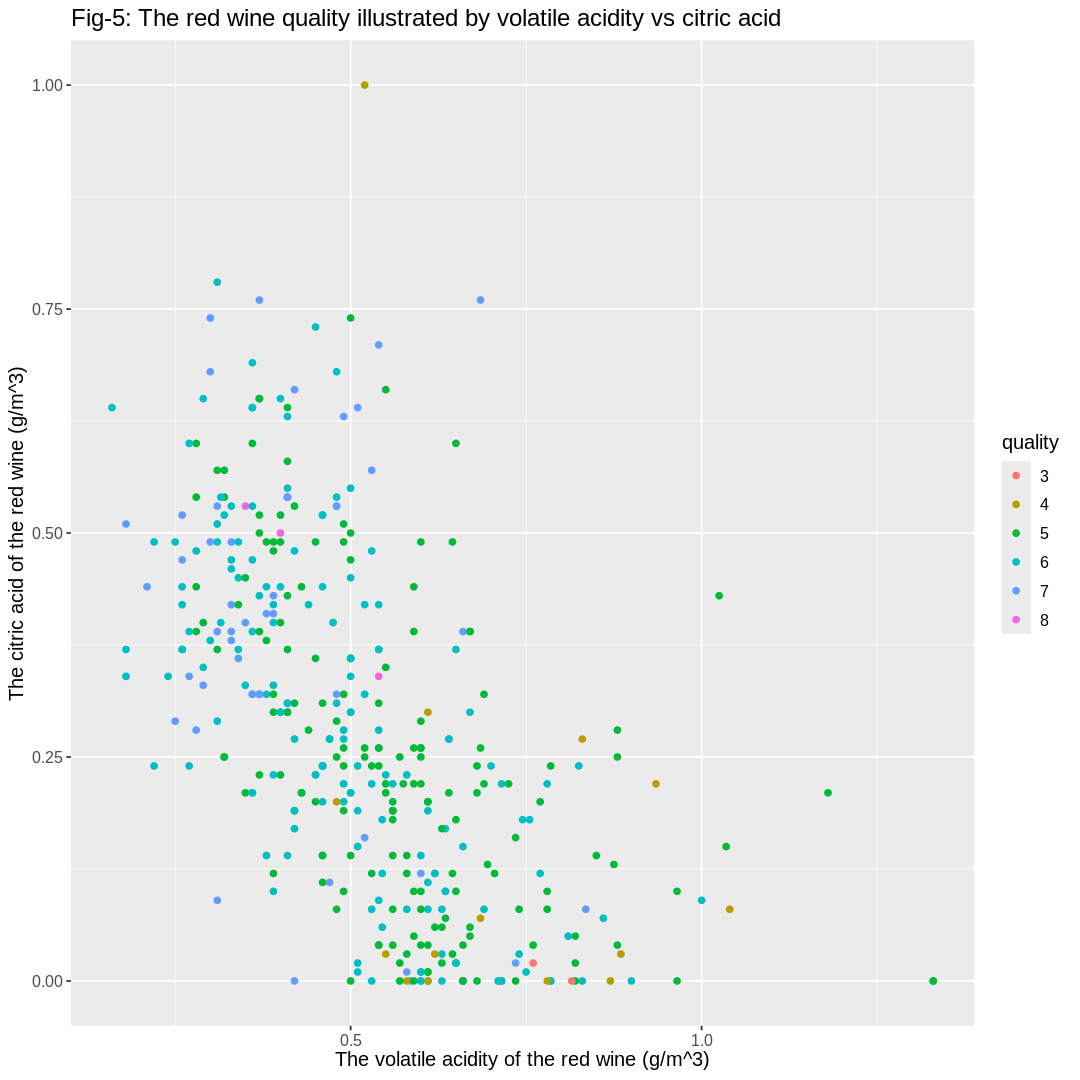

In [17]:

volatile_acidity_vs_citric_acid_predicted <- redwine_test_predictions |> 
    ggplot(aes(x= volatile_acidity, y= citric_acid, color= .pred_class))+
    geom_point()+
    labs(x= "The volatile acidity of the red wine (g/m^3)", y="The citric acid of the red wine (g/m^3)",
        color = "predicted quality") +
    theme(text=element_text(size=12)) +
    ggtitle("Fig-4: The predicted red wine quality illustrated by volatile acidity vs citric acid")

volatile_acidity_vs_citric_acid <- redwine_test_predictions |> 
    ggplot(aes(x= volatile_acidity, y= citric_acid, color= quality))+
    geom_point()+
    labs(x= "The volatile acidity of the red wine (g/m^3)", y="The citric acid of the red wine (g/m^3)",
        color = "quality") +
    theme(text=element_text(size=12)) +
    ggtitle("Fig-5: The red wine quality illustrated by volatile acidity vs citric acid")

volatile_acidity_vs_citric_acid_predicted
volatile_acidity_vs_citric_acid

# Discussion and Conclusion #

Using properly selected predictors, we aim to create a model that can accurately predict red wine quality in this project. This would give us more insight into what chemical component has the most significant influence on red wine quality, which can be used as indicators to predict wine quality labels for any observation. We expect the volatile acidity to be a driving predictor for quality as acidity is important in influencing wine colour, balance and taste (Cortez et al., 2009). According to the data representation and analysis processes above, we can see that volatile acidity and citric acid levels are indeed strongly correlated with red wine quality. To create a model with the best number of neighbors that predict the class of wine quality, we split our clean data into 75% training and 25% testing datasets. This ensures we reduce the impact of variance and best estimate the performance of our model. Moreover, due to the inequality between the number of samples for different wine qualities, we scaled our data by oversampling across all wine qualities to ensure they all had the same impact on our predicting model’s performance. Furthermore, we performed a 5-fold cross-validation test by equally splitting our training dataset into five validation sets. By extracting the mean accuracy of different numbers of neighbors, we noticed that both K=1 and K=2 have the highest mean accuracy. However, since choosing K=1 makes our model significantly more sensitive to changes, we chose K=2 as our best predicting model. Since we know that volatile acidity and citric acid levels are most directly linked to wine quality, we put volatile acidity on the x-axis and citric acid level on the y-axis. Such graphs would enable our model to perform K-NN classification on the wine quality label of any new observation based on the two most notable factors. After implementing the model to our testing dataset, we found that it accurately produces correct labels of wine quality for every observation, indicating that it still performs well on a dataset it did not train with. 

Our classification model is highly objective due to its fixed classification variables and high accuracy. Having two measurable and quantitative variables as our classification indicators best minimizes the influence of personal preference. Hence, the model can be better generalized to any population than other wine quality rating sources. 

We expect such findings to be particularly beneficial to the wine industry by providing a competitive edge to their product against other competitors. Furthermore, to consumers, having such knowledge can help with their purchases and understanding whether their wine is of higher quality. In conclusion, we believe that the model that performs K-NN classification with two neighbors has the best accuracy in predicting the qualities of wine. This is supported by the fact that our chosen model correctly predicted all observations across all wine qualities based on volatile acidity and citric acid levels, and the graphs of predicted and actual wine quality are identical. Linking back to our expectations at the beginning of the project, we also proved that volatile acidity is the most significant factor that accurately predicts wine quality. Therefore, our project has achieved the goal of generating a standard rubric of wine quality by identifying the most relevant factors. This reinforces our initiatives that wine companies will be able to produce higher quality wines at lower cost, and customers can make better choices in their wine consumption.

One thing worth mentioning is that we oversampled our data to reduce the imbalance of sample sizes for different wine qualities. Some wine quality, such as Quality = 3,4, 7, and 8, have dramatically small amounts of observation, making it hard to build a decent classification model. Although our classification model predicts all wine quality classes perfectly, we cannot say we are sure that our model is optimal. We can also consider other factors that affect the wine quality that were not added to our model. For example, the research leads to another interesting question that whether the wine glass or its temperature or structure affects the quality of the red wine. Other external factors such as terrain and the time of year the grape is grown are also potential factors to explore in future studies.on.

### Refrences 

Cortez, P. et al. “Modeling wine preferences by data mining from physicochemical properties.” *Decis. Support Syst.* 47 (2009): 547-553.

Firke, S. (2023, February 2). *Simple Tools for Examining and Cleaning Dirty Data [R package janitor version 2.2.0].* https://cran.r-project.org/package=janitor

Tedesco, I. et al. "Antioxidant effect of red wine polyphenols on red blood cells." *The Journal of nutritional biochemistry* 11.2 (2000): 114-119.

*The 4 factors and 4 indicators of wine quality.* (2018, October 23). JJ Buckley Fine Wines. https://www.jjbuckley.com/wine-knowledge/blog/the-4-factors-and-4-indic%20ators-of-wine-quality/1009

Wickham, H. ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York,2016

Zhang, X. et al. "Red wine coloration: A review of pigmented molecules, reactions, and applications." *Comprehensive Reviews in Food Science and Food Safety* 21.5 (2022): 3834-3866. 
